# Project Overview

** Bahman Roostaei **

## This is a proof of concept notebook lab of the project. The deliverable is plotted at the end.

The analysis is going to be focused on specific region, here defined by the name of the city and the country.
On each region, the sentiment of the collection of tweets is determined for every weather attributes. 

In [9]:
reset -fs

In [69]:
sc

In [76]:
from pyspark.sql.functions import explode,UserDefinedFunction
from pyspark.sql.functions import col
from pyspark.sql import Row
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
import matplotlib.pylab as plt

In [13]:
from pyspark.sql.types import FloatType, StringType

In [6]:
#raw_tweets = spark.read.json('s3a://climatesentimenttweet/2017/*/*/*/*')

In [7]:
#raw_tweets = spark.read.json('s3a://climatesentimenttweet/2017/03/05/22/twitter_delivery_2-4-2017-03-05-22-29-24-f4ab7b00-d876-4fde-886d-d92da65b236d')

In [14]:
raw_tweets = spark.read.json('s3a://climatesentimenttweet/2017/03/05/*/*')

In [ ]:
#raw_t = sqlContext.read.json('s3a://climatesentimenttweet/2017/03/05/22/twitter_delivery_2-4-2017-03-05-22-29-24-f4ab7b00-d876-4fde-886d-d92da65b236d')

In [15]:
raw_weather = spark.read.json('s3a://climatesentimentdata/2017/*/*/*/*')

In [16]:
raw_tweets.cache();

In [ ]:
#raw_tweets.printSchema()

In [17]:
raw_tweets_filtered = raw_tweets.filter('id is not null')

In [18]:
user_df = raw_tweets_filtered.selectExpr('user.id AS user_id','place.country_code AS tweet_country','place.name AS tweet_city').distinct()

In [19]:
user_df_clean = user_df.filter('tweet_country is not null and tweet_city is not null')

In [68]:
user_df_clean.show(10)

+----------+-------------+-----------+
|   user_id|tweet_country| tweet_city|
+----------+-------------+-----------+
|2714840130|           TR|     Gemlik|
|1636589420|           TR|   İstanbul|
| 172657411|           US|    Memphis|
|3168232172|           JP|     大阪市 西区|
| 197253764|           MX|Guadalajara|
|2847638726|           JP|    福岡市 早良区|
|1708811346|           FR|      Rodez|
|2946631609|           TH|    สระบุรี|
| 111852969|           JP|        青森市|
|3351097209|           US|    Chicago|
+----------+-------------+-----------+
only showing top 10 rows



In [ ]:
#user_df.write.parquet('s3a://climsentdata/climsentuser')

In [20]:
tweet_df = raw_tweets_filtered.selectExpr('id AS tweet_id', 'user.id AS user_id', 'text',
                                         'lang AS language')

In [21]:
tweet_df.show(10)

+------------------+------------------+--------------------+--------+
|          tweet_id|           user_id|                text|language|
+------------------+------------------+--------------------+--------+
|838457865836904450|         412754740|RT @NFL: MYLES GA...|      en|
|838457865811689473|778382134725713920|I liked a @YouTub...|      en|
|838457865824239616|821397213775622146|Scalextric SCX Re...|      ht|
|838457865828347904|         817657400|Hahahahahahahahah...|      tl|
|838457865828388864|        3513938114|You forget your v...|      en|
|838457865820069888|         449344082|RT @marianaccmelo...|      pt|
|838457865811677185|        1848850261|RT @hellmaker77: ...|      el|
|838457865815932929|794984386567487488|@ourjenners_ obri...|      pt|
|838457865803280385|        2935389119|RT @valdir_furtad...|      pt|
|838457865803337728|         340831240|RT @MzLee_: 😍😍 ...|     und|
+------------------+------------------+--------------------+--------+
only showing top 10 ro

In [ ]:
#tweet_df.write.parquet('s3a://climsentdata/climsenttweet')

In [ ]:
#raw_weather.printSchema()

In [22]:
weather_data = raw_weather.select(explode(raw_weather.list)).selectExpr("col.*")

In [ ]:
#weather_data.registerTempTable('weather')

In [23]:
w_df = weather_data.selectExpr('name AS user_city','sys.country AS user_country','weather.description[0] AS condition',
                              'weather.main[0] AS parameter','main.temp AS temperature','main.pressure AS pressure',
                              'main.humidity AS humidity',
                              'wind.speed AS wind_speed',
                              'clouds.all AS cloudiness')

In [24]:
w_df.show(10)

+-------------+------------+---------------+---------+-----------+--------+--------+----------+----------+
|    user_city|user_country|      condition|parameter|temperature|pressure|humidity|wind_speed|cloudiness|
+-------------+------------+---------------+---------+-----------+--------+--------+----------+----------+
|San Francisco|          US|     few clouds|   Clouds|       8.69|    1015|      66|       4.6|        20|
|  Kansas City|          US|   sky is clear|    Clear|      13.65|    1008|      67|       5.7|         1|
|     New York|          US|   sky is clear|    Clear|       1.71|    1027|      80|      0.97|         1|
|       Lisbon|          PT|overcast clouds|   Clouds|       8.11|     990|      96|      10.3|        90|
|        Paris|          FR|  broken clouds|   Clouds|        4.6|     994|      75|       6.7|        75|
|       Berlin|          DE|   Sky is Clear|    Clear|       10.0|     992|      66|       6.2|         0|
|       Prague|          CZ|   Sky is

In [ ]:
#udf = UserDefinedFunction(time_range,FloatType())

In [ ]:
#new_w_df = w_df.withColumn('time', udf(w_df.time))

In [25]:
new_w_df = w_df

In [ ]:
#new_w_df.registerTempTable('weather')

In [ ]:
#w_time_data = spark.sql(sqlQuery='SELECT time FROM weather')

In [ ]:
#times = w_time_data.collect()

In [ ]:
#udf_tweet = UserDefinedFunction(time_range_tweet,FloatType())

In [ ]:
#new_tweet_df = tweet_df.withColumn('tweet_time', udf_tweet(tweet_df.tweet_time))

In [26]:
new_tweet_df = tweet_df

In [27]:
new_tweet_df.show(10)

+------------------+------------------+--------------------+--------+
|          tweet_id|           user_id|                text|language|
+------------------+------------------+--------------------+--------+
|838457865836904450|         412754740|RT @NFL: MYLES GA...|      en|
|838457865811689473|778382134725713920|I liked a @YouTub...|      en|
|838457865824239616|821397213775622146|Scalextric SCX Re...|      ht|
|838457865828347904|         817657400|Hahahahahahahahah...|      tl|
|838457865828388864|        3513938114|You forget your v...|      en|
|838457865820069888|         449344082|RT @marianaccmelo...|      pt|
|838457865811677185|        1848850261|RT @hellmaker77: ...|      el|
|838457865815932929|794984386567487488|@ourjenners_ obri...|      pt|
|838457865803280385|        2935389119|RT @valdir_furtad...|      pt|
|838457865803337728|         340831240|RT @MzLee_: 😍😍 ...|     und|
+------------------+------------------+--------------------+--------+
only showing top 10 ro

In [28]:
new_tweet_df.registerTempTable('tweets')

In [29]:
en_tweets_df = spark.sql(sqlQuery='SELECT * FROM tweets WHERE language="en"')

In [30]:
en_tweets_df.show(10)

+------------------+------------------+--------------------+--------+
|          tweet_id|           user_id|                text|language|
+------------------+------------------+--------------------+--------+
|838457865836904450|         412754740|RT @NFL: MYLES GA...|      en|
|838457865811689473|778382134725713920|I liked a @YouTub...|      en|
|838457865828388864|        3513938114|You forget your v...|      en|
|838457865807544322|826277126278152194|RT @pastelseok: c...|      en|
|838457865803350020|        2764800985|Bible https://t.c...|      en|
|838457240872972288|         330162108|People be DICKEAT...|      en|
|838457870005977088|        1388228670|Woke Up Phone Off...|      en|
|838457870001782785|709473485613977601|RT @ScottPresler:...|      en|
|838457870022819843|        3065380127|Peter Sotos was o...|      en|
|838457870010187777|        2338738272|Van Roy's Law: An...|      en|
+------------------+------------------+--------------------+--------+
only showing top 10 

In [31]:
en_tweet_joined = en_tweets_df.join(user_df,en_tweets_df.user_id == user_df.user_id)

In [32]:
en_tweet_all = en_tweet_joined.filter('tweet_city is not null')

In [33]:
en_tweet_all = en_tweet_all.filter('tweet_country is not null')

In [34]:
en_tweet_all.show(10)

+------------------+------------------+--------------------+--------+------------------+-------------+--------------+
|          tweet_id|           user_id|                text|language|           user_id|tweet_country|    tweet_city|
+------------------+------------------+--------------------+--------+------------------+-------------+--------------+
|838457870010171395|        2645785765|love #TheJump wou...|      en|        2645785765|           GB|   Northampton|
|838457266047188994|         967422793|Gotta love having...|      en|         967422793|           US|       Slidell|
|838457878386135040|          27062226|Throwback shot in...|      en|          27062226|           SG|Central Region|
|838457882584678400|          42097308|Is "panoptical" a...|      en|          42097308|           CA|        Guelph|
|838457886808354818|         184939350|Tina #Kandelaki p...|      en|         184939350|           DE|       München|
|838457891002564608|          22452261|See our latest #C

In [35]:
en_tweet_all.registerTempTable('en_tweets')

In [36]:
x = spark.sql('SELECT * FROM en_tweets WHERE tweet_city == "Paris"')

In [37]:
x.show()

+------------------+------------------+--------------------+--------+------------------+-------------+----------+
|          tweet_id|           user_id|                text|language|           user_id|tweet_country|tweet_city|
+------------------+------------------+--------------------+--------+------------------+-------------+----------+
|838498508613251072|         601008978|@zeyoncenation wh...|      en|         601008978|           FR|     Paris|
|838446360835706881|         228405365|Life is beautiful...|      en|         228405365|           FR|     Paris|
|838275400992243712|        1178504995|Currently 3°C at ...|      en|        1178504995|           FR|     Paris|
|838321114728263680|        1520212915|#Slayer princess ...|      en|        1520212915|           FR|     Paris|
|838321559320186880|         298138794|@KLM hello I woul...|      en|         298138794|           FR|     Paris|
|838426848925257728|          15432179|@RoyceKoop thank ...|      en|          15432179|

In [38]:
new_w_df.show(10)

+-------------+------------+---------------+---------+-----------+--------+--------+----------+----------+
|    user_city|user_country|      condition|parameter|temperature|pressure|humidity|wind_speed|cloudiness|
+-------------+------------+---------------+---------+-----------+--------+--------+----------+----------+
|San Francisco|          US|     few clouds|   Clouds|       8.69|    1015|      66|       4.6|        20|
|  Kansas City|          US|   sky is clear|    Clear|      13.65|    1008|      67|       5.7|         1|
|     New York|          US|   sky is clear|    Clear|       1.71|    1027|      80|      0.97|         1|
|       Lisbon|          PT|overcast clouds|   Clouds|       8.11|     990|      96|      10.3|        90|
|        Paris|          FR|  broken clouds|   Clouds|        4.6|     994|      75|       6.7|        75|
|       Berlin|          DE|   Sky is Clear|    Clear|       10.0|     992|      66|       6.2|         0|
|       Prague|          CZ|   Sky is

In [39]:
tweet_w_df = en_tweet_all.join(new_w_df,new_w_df.user_city == en_tweet_all.tweet_city).distinct()

In [40]:
tweet_w_df.show(10)

+------------------+--------+--------------------+--------+--------+-------------+----------+---------+------------+-------------+---------+-----------+--------+--------+----------+----------+
|          tweet_id| user_id|                text|language| user_id|tweet_country|tweet_city|user_city|user_country|    condition|parameter|temperature|pressure|humidity|wind_speed|cloudiness|
+------------------+--------+--------------------+--------+--------+-------------+----------+---------+------------+-------------+---------+-----------+--------+--------+----------+----------+
|838324235298832384|29913493|L - Day2  🇵🇹 
#...|      en|29913493|           PT|    Lisbon|   Lisbon|          PT|          fog|      Fog|      10.83|    1023|      82|       2.1|         0|
|838324235298832384|29913493|L - Day2  🇵🇹 
#...|      en|29913493|           PT|    Lisbon|   Lisbon|          PT|         mist|     Mist|      10.85|    1023|      76|       2.6|         0|
|838324235298832384|29913493|L - Day2  

In [41]:
tweet_w_df.registerTempTable('data')

In [42]:
condition = 'clear'

In [43]:
temp_data = spark.sql('SELECT text FROM data WHERE condition LIKE condition').distinct()

In [44]:
temp_data.show()

+--------------------+
|                text|
+--------------------+
|Final breathe of ...|
|@andreamez The fe...|
|RT @Im_Fat_Narwha...|
|When Duke Loses, ...|
|Cute https://t.co...|
|@realDonaldTrump ...|
|@fabolouswarren y...|
|2017 Winter Spart...|
|Earlier before th...|
|Them actions is w...|
|I WANT ONE https:...|
|God Bless @Martha...|
|RT @jaketapper: P...|
|RT @ItsFoodPorn: ...|
|RT @DollarinCash:...|
|Join the CVS Heal...|
|Currently in my U...|
|NEWSFLASH. Just b...|
|This literally lo...|
|RT @QueerMeNow: H...|
+--------------------+
only showing top 20 rows



In [47]:
def cloudiness_pair(rec_dict):
    cldness = rec_dict.get('cloudiness')
    text = rec_dict.get('text')
    if cldness < 25:
        return ('L',text)
    elif 25 <= cldness < 70:
        return ('M',text)
    else:
        return ('H',text)
    
def text_reduce(text_1,text_2):
    text_1 = text_1.strip()
    text_1 = text_1.split()
    text_2 = text_2.strip()
    text_2 = text_2.split()
    text = text_1 + text_2
    text_set = set(text)
    return ' '.join(text_set)
    

rdd_row = temp_data.rdd
rdd_dict = rdd_row.map(lambda x:x.asDict())
rdd_text = rdd_dict.map(lambda x:x.get('text'))
rdd_cld = rdd_dict.map(cloudiness_pair)
rdd_cld_red = rdd_cld.reduceByKey(text_reduce)

In [48]:
rdd_pair = rdd_text.map(lambda x:(1,x))

In [49]:
rdd_red = rdd_pair.reduceByKey(lambda a,b:a+b)

In [50]:
val, text = rdd_red.collect()[0]

In [ ]:
#text

In [51]:
from nltk.corpus import stopwords
from textblob import TextBlob

In [52]:
blob = TextBlob(text)

In [53]:
blob.polarity

0.17337920300696025

In [54]:
tweet_w_rdd = tweet_w_df.rdd

In [ ]:
#tweet_w_rdd.take(2)

In [55]:
rdd_dict = tweet_w_rdd.map(lambda x:x.asDict())

In [56]:
#x = rdd_dict.take(2)

In [57]:
#x

cloudiness:

In [58]:
def cloudiness_pair(rec_dict):
    cldness = rec_dict.get('cloudiness')
    text = rec_dict.get('text')
    if cldness < 25:
        return ('L',text)
    elif 25 <= cldness < 70:
        return ('M',text)
    else:
        return ('H',text)

In [59]:
rdd_cld = rdd_dict.map(cloudiness_pair)

In [60]:
#rdd_cld.take(3)

In [61]:
def text_reduce(text_1,text_2):
    text_1 = text_1.strip()
    text_1 = text_1.split()
    text_2 = text_2.strip()
    text_2 = text_2.split()
    text = text_1 + text_2
    text_set = set(text)
    return ' '.join(text_set)


In [62]:
rdd_cld_red = rdd_cld.reduceByKey(text_reduce)

In [63]:
rdd_cld_red.take(1)

[('H',
  u'@DanPultzMGMT @WesCampbellXXX NYT sleet sleep hate forget https://t.co/kdhJnLJl4K Watch #rocktheboat deportations. under @ shielding Cute @JasonMillerinDC GC https://t.co/FNyzYz250r SNF school NY? #Kent, SNL FUCKING MAN tired me. \U0001f30d japanese families. her? me? me: even Partly saved + Game https://t.co/UMSrPsGems new ever told Made hero Albia never here @MarthaRaddatz... dreams.. @jaketapper: active https://t.co/pfmcZbwXTk @Eurostar property Forecast: study PRES @Mariobatali military i\'m changer ICU, @NHL: @usnews St. shelter. Three Health burns. Star \U0001f44d\U0001f3fc\U0001f44d\U0001f3fc\U0001f44d\U0001f3fc would #type1diabetes right? https://t.co/FYcKKt1uaz music #partiyorkie\u2026 recommend tryin tell @AHuynhArts breathe dry. https://t.co/fRiKjawfBU dressing \u2018Dj it phone https://t.co/3tFLwvY8x1 me room rights work cant time...your EDY my route give Lo https://t.co/Pxu5NNqFl1 MCCAIN reviewing want https://t.co/HXhJdgDrH3 Bunny Trump\u2019s end feature ONE h

In [64]:
#rdd_cld_red = rdd_cld.reduceByKey(lambda a,b:a+b)

In [65]:
cld_text = rdd_cld_red.collect()

In [74]:
def to_df(col,paired_data):
    w_list = []
    pol_list = []
    Record = Row(col, 'polarity')
    for w,text in paired_data:
        blob = TextBlob(text)
        pol_list.append(blob.polarity)
        w_list.append(w)
    #cond_df = pd.DataFrame({'condition':cond_list,'polarity':pol_list})
    w_df = spark.createDataFrame([Record(w_list[i],pol_list[i]) for i in range(len(w_list))])
    return w_df

In [ ]:
#def cld_sent(paired_data):
#    cld_list = []
#    pol_list = []
#    for cld,text in paired_data:
#        blob = TextBlob(text)
#        pol_list.append(blob.polarity)
#        cld_list.append(cld)
#    cld_df = pd.DataFrame({'cloud_level':cld_list,'polarity':pol_list})
#    return cld_df

In [80]:
cnd_df = to_df('cloudiness',cld_text)

In [81]:
cnd_df.show(10)

+----------+-------------------+
|cloudiness|           polarity|
+----------+-------------------+
|         H|0.13144867351117348|
|         M| 0.1332858525079992|
|         L|0.13144867351117348|
+----------+-------------------+



In [82]:
def condition_pair(rec_dict):
    cond = rec_dict.get('condition')
    text = rec_dict.get('text')
    return (cond,text)

In [83]:
rdd_cond = rdd_dict.map(condition_pair)

In [84]:
rdd_cond.take(2)

[(u'fog',
  u'L - Day2  \U0001f1f5\U0001f1f9 \n#Lisbon #friends #instalove #Belem #belemtower #weekend #happy #trip\u2026 https://t.co/q2GMKAru97'),
 (u'mist',
  u'L - Day2  \U0001f1f5\U0001f1f9 \n#Lisbon #friends #instalove #Belem #belemtower #weekend #happy #trip\u2026 https://t.co/q2GMKAru97')]

In [85]:
rdd_cond_red = rdd_cond.reduceByKey(text_reduce)

In [86]:
cond_collect = rdd_cond_red.collect()

In [87]:
cnd_cond_df = to_df('condition',cond_collect)

In [88]:
cnd_cond_df.show(10)

+--------------------+-------------------+
|           condition|           polarity|
+--------------------+-------------------+
|thunderstorm with...|0.13168537878787878|
|thunderstorm with...|0.07496532788199456|
|       broken clouds|0.12959056540306535|
|proximity thunder...| 0.1314843922804689|
|          heavy snow|0.06121255411255413|
|    scattered clouds|0.12959056540306535|
|       moderate rain|0.14644586038961036|
|light intensity d...|0.19063391944530342|
|        shower sleet|0.19062500000000002|
|          light rain|0.12884732215982214|
+--------------------+-------------------+
only showing top 10 rows



In [90]:
cond_pd = cnd_cond_df.toPandas()

In [91]:
cond_pd

,condition,polarity
0,thunderstorm with heavy rain,0.131685
1,thunderstorm with rain,0.074965
2,broken clouds,0.129591
3,proximity thunderstorm,0.131484
4,heavy snow,0.061213
5,scattered clouds,0.129591
6,moderate rain,0.146446
7,light intensity drizzle,0.190634
8,shower sleet,0.190625
9,light rain,0.128847


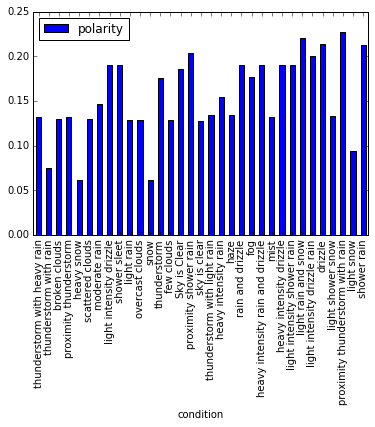

In [93]:
cond_pd.plot.bar(x='condition');